In [151]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from src.config import dados_treino, dados_teste
from src.graficos import compare_variables
from src.graficos import plot_correlation_with_target
from src.graficos import plot_target_correlation_heatmap


In [177]:
df = pd.read_csv(dados_treino)
df_teste = pd.read_csv(dados_teste)

## DATA CLEANING

In [179]:
df['LotFrontage'] = df['LotFrontage'].fillna(df.groupby('LotConfig')['LotFrontage'].transform('min'))
df['PoolQC'] = df['PoolQC'].fillna('No Pool')
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['Alley'] = df['Alley'].fillna('No alley access')
df['Fence'] = df['Fence'].fillna('No Fence')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')
df['GarageCond'] = df['GarageCond'].fillna('No Garage')
df['GarageType'] = df['GarageType'].fillna('No Garage')
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageQual'] = df['GarageQual'].fillna('No Garage')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df = df.fillna(-1)

df_teste['LotFrontage'] = df['LotFrontage'].fillna(df_teste.groupby('LotConfig')['LotFrontage'].transform('min'))
df_teste['PoolQC'] = df['PoolQC'].fillna('No Pool')
df_teste['MiscFeature'] = df['MiscFeature'].fillna('None')
df_teste['Alley'] = df['Alley'].fillna('No alley access')
df_teste['Fence'] = df['Fence'].fillna('No Fence')
df_teste['MasVnrType'] = df['MasVnrType'].fillna('None')
df_teste['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')
df_teste['GarageCond'] = df['GarageCond'].fillna('No Garage')
df_teste['GarageType'] = df['GarageType'].fillna('No Garage')
df_teste['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df_teste['GarageQual'] = df['GarageQual'].fillna('No Garage')
df_teste['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')
df_teste['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')
df_teste['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df_teste['BsmtCond'] = df['BsmtCond'].fillna('No Basement')
df_teste['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')
df_teste['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df_teste = df_teste.fillna(-1)

In [6]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [7]:
df.nunique().sort_values(ascending=False).head(10)

Id             1460
LotArea        1073
GrLivArea       861
BsmtUnfSF       780
1stFlrSF        753
TotalBsmtSF     721
SalePrice       663
BsmtFinSF1      637
GarageArea      441
2ndFlrSF        417
dtype: int64

## Understanding 

#### All

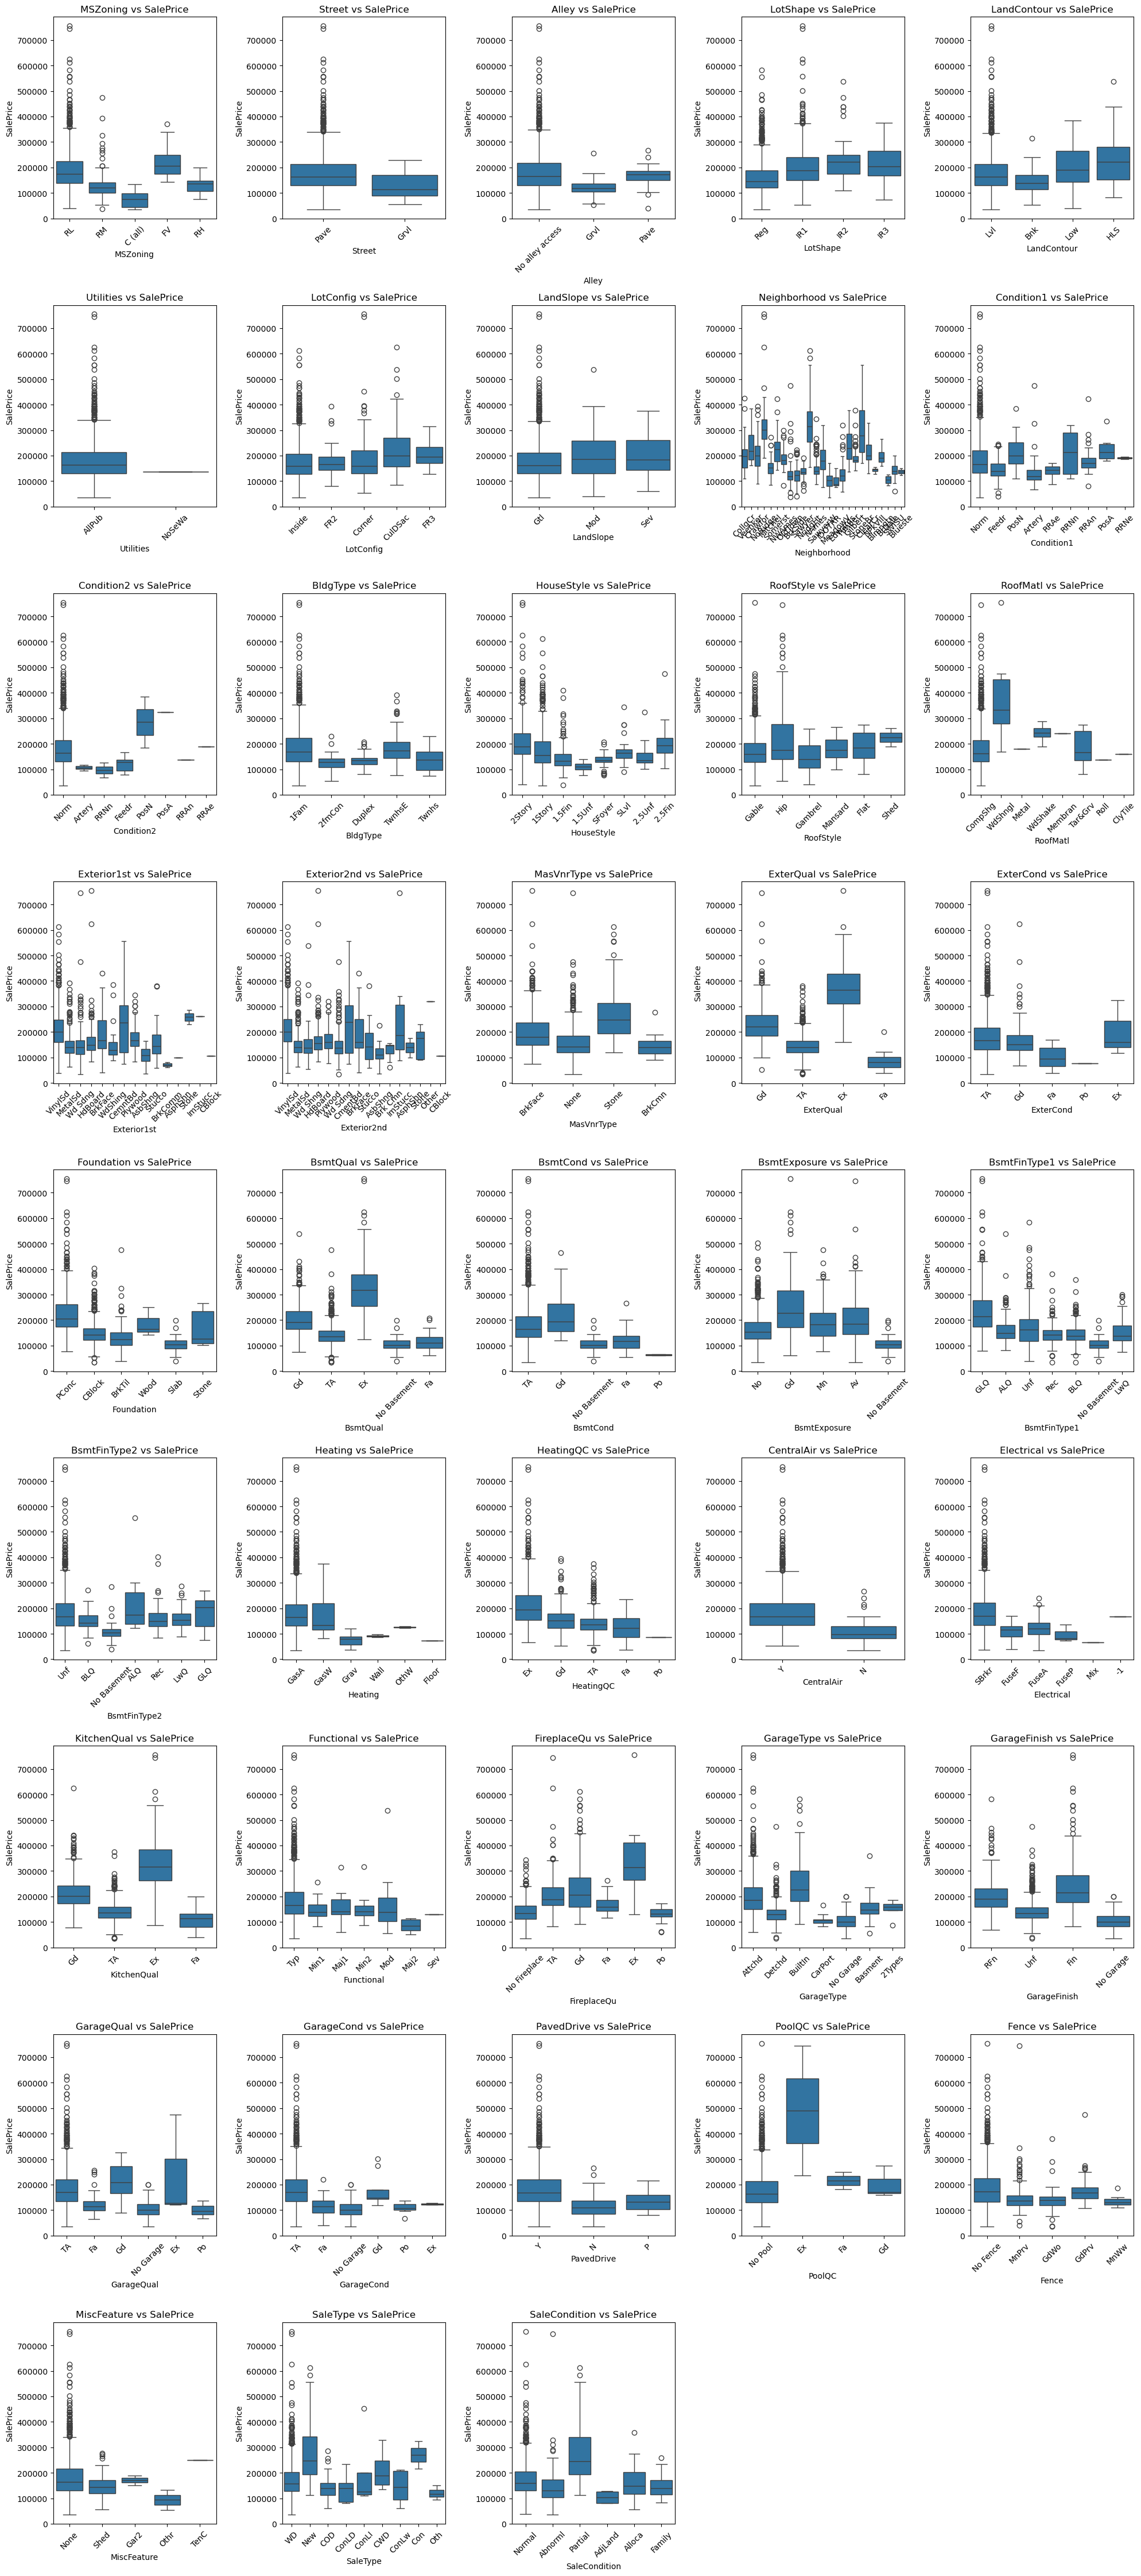

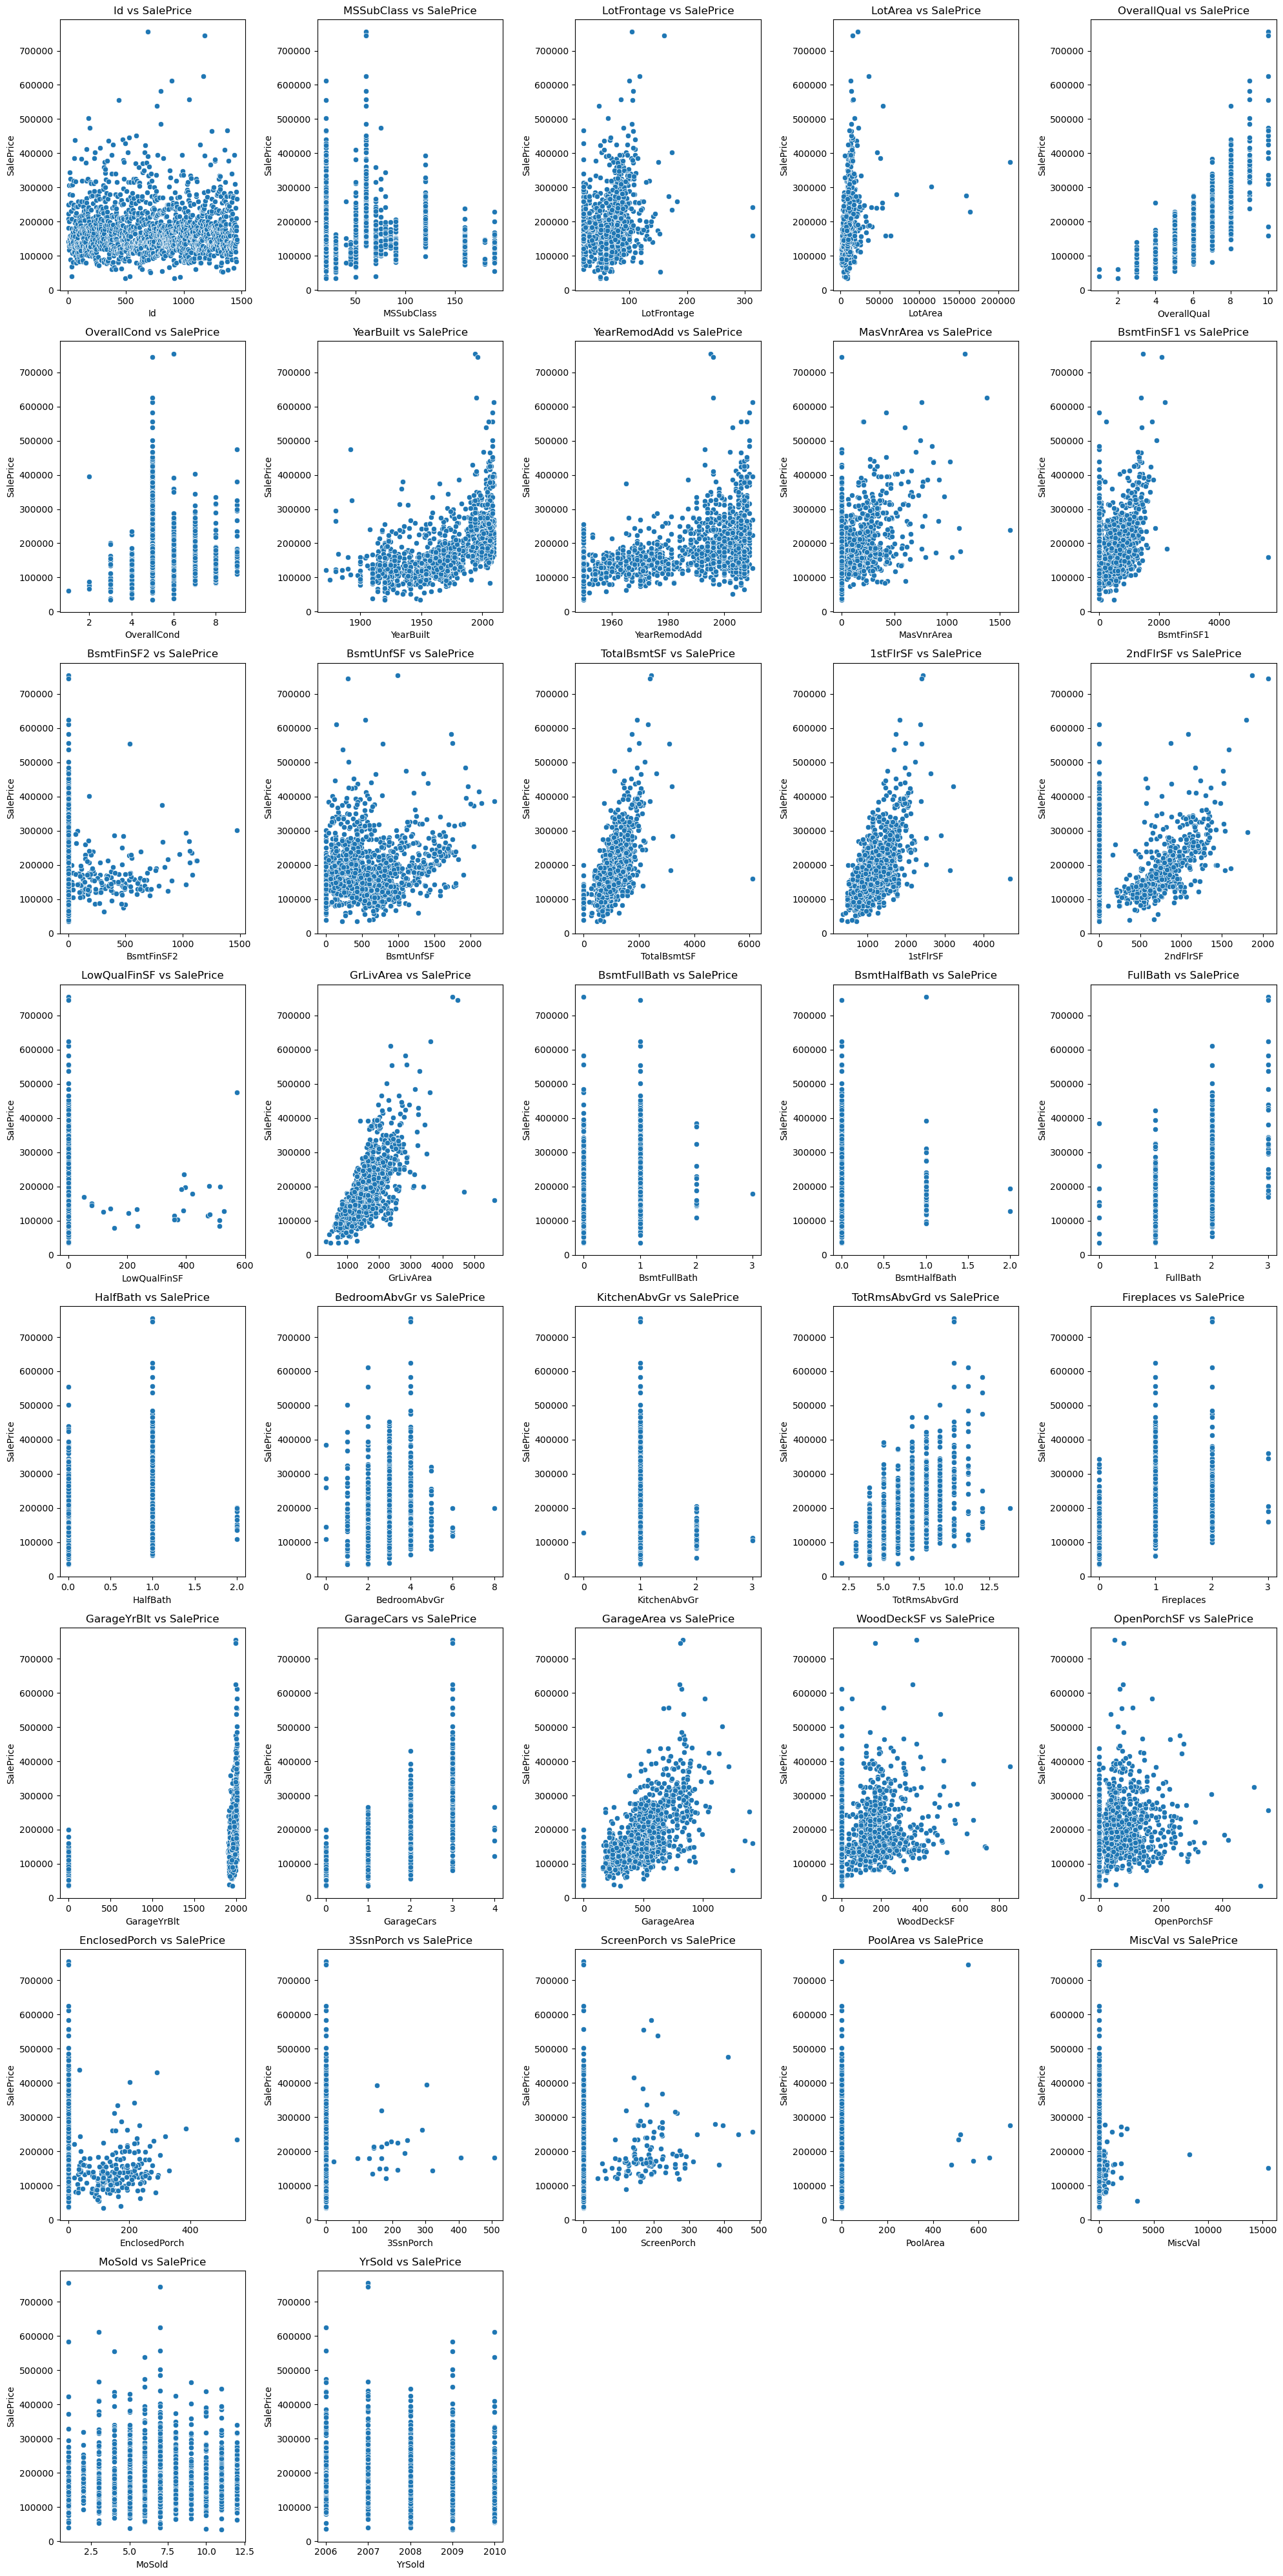

In [189]:
compare_variables(df, target='SalePrice')

#### Numeric Types

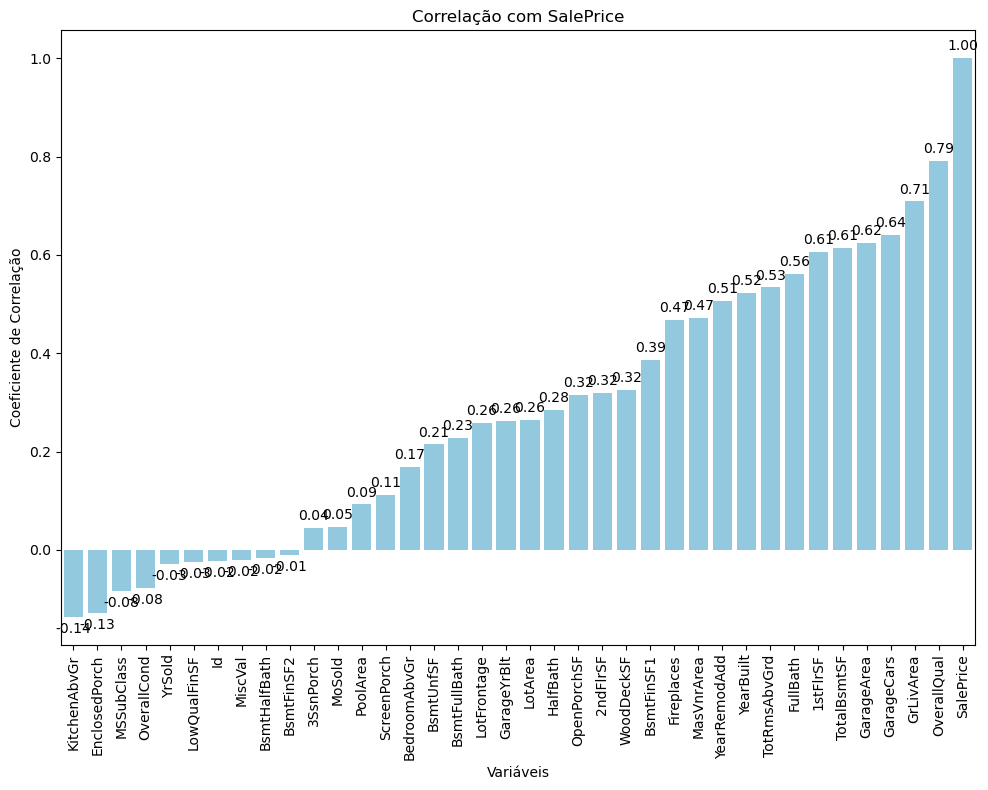

In [23]:
plot_correlation_with_target(df, target='SalePrice')

#### Text Type

In [35]:
obj_col = df.columns[df.dtypes == 'object']
df[obj_col]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1456,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,No Pool,MnPrv,None,WD,Normal
1457,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,GdPrv,Shed,WD,Normal
1458,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Normal


In [83]:
expensive_houses = df.sort_values('SalePrice').tail(20)
expensive_houses = expensive_houses[obj_col]
cheap_houses =  df.sort_values('SalePrice').head(20)
cheap_houses = cheap_houses[obj_col]

In [63]:
expensive_houses.nunique().sort_values(ascending=False).head(10)

Exterior2nd     7
Exterior1st     5
Neighborhood    4
BsmtExposure    4
BsmtQual        3
SaleType        3
Fence           3
GarageFinish    3
GarageType      3
FireplaceQu     3
dtype: int64

In [65]:
cheap_houses.nunique().sort_values(ascending=False).head(10)

Exterior2nd     8
Exterior1st     7
Neighborhood    6
Functional      4
BsmtExposure    4
BsmtFinType1    4
HeatingQC       4
Electrical      4
BsmtCond        4
GarageType      4
dtype: int64

In [75]:
rep = pd.concat([cheap_houses.nunique(),expensive_houses.nunique()],axis=1).sort_values([0,1]).head(10)

In [77]:
expensive_houses[rep.index]

,Utilities,Condition2,RoofMatl,PoolQC,MasVnrType,Street,BldgType,Heating,CentralAir,PavedDrive
389,AllPub,Norm,CompShg,No Pool,Stone,Pave,1Fam,GasA,Y,Y
496,AllPub,Norm,CompShg,No Pool,None,Pave,1Fam,GasA,Y,Y
349,AllPub,Norm,CompShg,No Pool,BrkFace,Pave,1Fam,GasA,Y,Y
58,AllPub,Norm,CompShg,No Pool,BrkFace,Pave,1Fam,GasA,Y,Y
473,AllPub,Norm,CompShg,No Pool,BrkFace,Pave,1Fam,GasA,Y,Y
527,AllPub,Norm,CompShg,No Pool,Stone,Pave,1Fam,GasA,Y,Y
591,AllPub,Norm,CompShg,No Pool,Stone,Pave,1Fam,GasA,Y,Y
1243,AllPub,Norm,CompShg,No Pool,None,Pave,1Fam,GasA,Y,Y
1373,AllPub,Norm,CompShg,No Pool,BrkFace,Pave,1Fam,GasA,Y,Y
185,AllPub,Norm,WdShngl,No Pool,None,Pave,1Fam,GasA,Y,Y


In [79]:
cheap_houses[rep.index]

,Utilities,Condition2,RoofMatl,PoolQC,MasVnrType,Street,BldgType,Heating,CentralAir,PavedDrive
495,AllPub,Norm,CompShg,No Pool,None,Pave,1Fam,GasA,N,N
916,AllPub,Norm,CompShg,No Pool,None,Pave,1Fam,GasA,N,Y
968,AllPub,Norm,CompShg,No Pool,None,Pave,1Fam,Grav,N,Y
533,AllPub,Norm,CompShg,No Pool,None,Pave,1Fam,GasA,N,N
30,AllPub,Norm,CompShg,No Pool,None,Pave,1Fam,GasA,N,N
710,AllPub,Norm,CompShg,No Pool,None,Pave,1Fam,GasA,Y,N
1337,AllPub,Norm,CompShg,No Pool,None,Pave,1Fam,Grav,N,N
705,AllPub,Norm,CompShg,No Pool,None,Pave,2fmCon,GasA,N,N
1325,AllPub,Norm,CompShg,No Pool,None,Pave,1Fam,GasA,N,N
812,AllPub,Norm,CompShg,No Pool,None,Grvl,1Fam,GasA,N,N


#### specific columns

In [181]:
df_feature = df.copy()
df_teste_feature = df_teste.copy()

In [183]:
# Consigo transformar para binário
df_feature['CentralAir'] = df_feature.CentralAir.apply(lambda x: 1 if x == 'Y' else 0)
df_teste_feature['CentralAir'] = df_teste_feature.CentralAir.apply(lambda x: 1 if x == 'Y' else 0)
df_feature['is_new'] = df_feature.SaleType.apply(lambda x: 1 if x == 'New' else 0)
df_teste_feature['is_new'] = df_teste_feature.SaleType.apply(lambda x: 1 if x == 'New' else 0)

In [185]:
# Criando novas variáveis
df_feature['TotalUsableArea'] = df_feature['TotalBsmtSF'] + df_feature['1stFlrSF'] + df_feature['2ndFlrSF']
df_feature['TotalExteriorArea'] = df_feature['OpenPorchSF'] + df_feature['EnclosedPorch'] + df_feature['ScreenPorch'] + df_feature['WoodDeckSF']
df_feature['PorchDeckArea'] = df_feature['OpenPorchSF'] + df_feature['EnclosedPorch'] + df_feature['ScreenPorch'] + df_feature['WoodDeckSF']
df_feature['TotalConstructedArea'] = df_feature['1stFlrSF'] + df_feature['2ndFlrSF'] + df_feature['TotalBsmtSF'] + df_feature['GarageArea']

# Criando novas variáveis
df_teste_feature['TotalUsableArea'] = df_teste_feature['TotalBsmtSF'] + df_teste_feature['1stFlrSF'] + df_teste_feature['2ndFlrSF']
df_teste_feature['TotalExteriorArea'] = df_teste_feature['OpenPorchSF'] + df_teste_feature['EnclosedPorch'] + df_teste_feature['ScreenPorch'] + df_teste_feature['WoodDeckSF']
df_teste_feature['PorchDeckArea'] = df_teste_feature['OpenPorchSF'] + df_teste_feature['EnclosedPorch'] + df_teste_feature['ScreenPorch'] + df_teste_feature['WoodDeckSF']
df_teste_feature['TotalConstructedArea'] = df_teste_feature['1stFlrSF'] + df_teste_feature['2ndFlrSF'] + df_teste_feature['TotalBsmtSF'] + df_teste_feature['GarageArea']


In [201]:
# Lista de colunas para remover
colunas_para_remover = [
    'Utilities', 'Street', 'Alley', 'LandContour', 'LotConfig', 
    'Condition1', 'BldgType', 'HouseStyle', 'RoofMatl', 'Exterior2st', 
    'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'Electrical', 'Functional',
    'GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageQual','GarageCond',
    'PoolQC','PoolArea','Fence','MiscFeature','SaleType','SaleCondition','BsmtQual',
    'LowQualFinSF','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr',
    'TotalBsmtSF','1stFlrSF','2ndFlrSF','OpenPorchSF','EnclosedPorch','ScreenPorch',
    'WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch','WoodDeckSF','1stFlrSF',
    '2ndFlrSF','TotalBsmtSF','TotalBsmtSF','MiscVal','MoSold','YrSold','Condition2','3SsnPorch']

for coluna in colunas_para_remover:
    if coluna in df_feature.columns:
        df_feature = df_feature.drop(coluna, axis=1)
    if coluna in df_teste_feature.columns:
        df_teste_feature = df_teste_feature.drop(coluna, axis=1)


In [189]:
#Não preciso usar o ordinal enconder ainda
def paved(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    elif x == 'P':
        return 0.5
    else:
        return -1

df_feature['PavedDrive'] = df_feature.PavedDrive.apply(paved)
df_teste_feature['PavedDrive'] = df_teste_feature.PavedDrive.apply(paved)

Group by:
- RoofStyle(Gable, Hip, Other)

In [191]:
def group_roof_style(value):
    if value == "Gable":
        return "Gable"
    elif value == "Hip":
        return "Hip"
    else:
        return "Other"

df_feature['RoofStyle_Grouped'] = df_feature['RoofStyle'].apply(group_roof_style)
df_teste_feature['RoofStyle_Grouped'] = df_teste_feature['RoofStyle'].apply(group_roof_style)

df_feature = df_feature.drop('RoofStyle', axis=1)
df_teste_feature = df_teste_feature.drop('RoofStyle', axis=1)

one hot enconder: 
- MSZoning
- Neighborhood
- Exterior1st
- MasVnrType
- Foundation
- RoofStyle

In [193]:
cols_to_encode = ['MSZoning', 'Neighborhood', 'Exterior1st', 'MasVnrType', 'Foundation', 'RoofStyle_Grouped']

df_feature = pd.get_dummies(df_feature, columns=cols_to_encode, drop_first=True)

df_teste_feature = pd.get_dummies(df_teste_feature, columns=cols_to_encode, drop_first=True)

missing_cols = set(df_feature.columns) - set(df_teste_feature.columns)
for col in missing_cols:
    df_teste_feature[col] = 0  
df_teste_feature = df_teste_feature[df_feature.columns] 


ordinal encoder: 
- LotShape (Reg->IR1->IR2->IR3)
- LandSlope(Gtl->Mod->Sev)
- ExterQual(Ex->Gd->TA->Fa->Po)
- HeatingQC (Ex->Gd->TA->Fa->Po)
- KitchenQual (Ex->Gd->TA->Fa)
- FireplaceQu (Ex->Gd->TA->Fa->Po->No Fireplace)

In [195]:
ordinal_mapping = {
    'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
    'LandSlope': ['Gtl', 'Mod', 'Sev'],
    'ExterQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'KitchenQual': ['Ex', 'Gd', 'TA', 'Fa'],
    'FireplaceQu': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'No Fireplace']
}

ordinal_encoder = OrdinalEncoder(categories=[ordinal_mapping[col] for col in ordinal_mapping], handle_unknown='use_encoded_value', unknown_value=-1)

df_feature[list(ordinal_mapping.keys())] = df_feature[list(ordinal_mapping.keys())].astype(str)
df_feature[list(ordinal_mapping.keys())] = ordinal_encoder.fit_transform(df_feature[list(ordinal_mapping.keys())])

df_teste_feature[list(ordinal_mapping.keys())] = df_teste_feature[list(ordinal_mapping.keys())].astype(str)
df_teste_feature[list(ordinal_mapping.keys())] = ordinal_encoder.transform(df_teste_feature[list(ordinal_mapping.keys())])

In [164]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1460 non-null   int64  
 1   MSSubClass               1460 non-null   int64  
 2   LotFrontage              1460 non-null   float64
 3   LotArea                  1460 non-null   int64  
 4   LotShape                 1460 non-null   float64
 5   LandSlope                1460 non-null   float64
 6   OverallQual              1460 non-null   int64  
 7   OverallCond              1460 non-null   int64  
 8   YearBuilt                1460 non-null   int64  
 9   YearRemodAdd             1460 non-null   int64  
 10  Exterior2nd              1460 non-null   object 
 11  MasVnrArea               1460 non-null   float64
 12  ExterQual                1460 non-null   float64
 13  HeatingQC                1460 non-null   float64
 14  CentralAir              

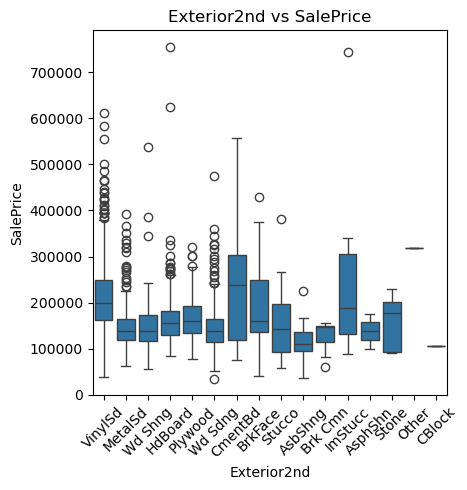

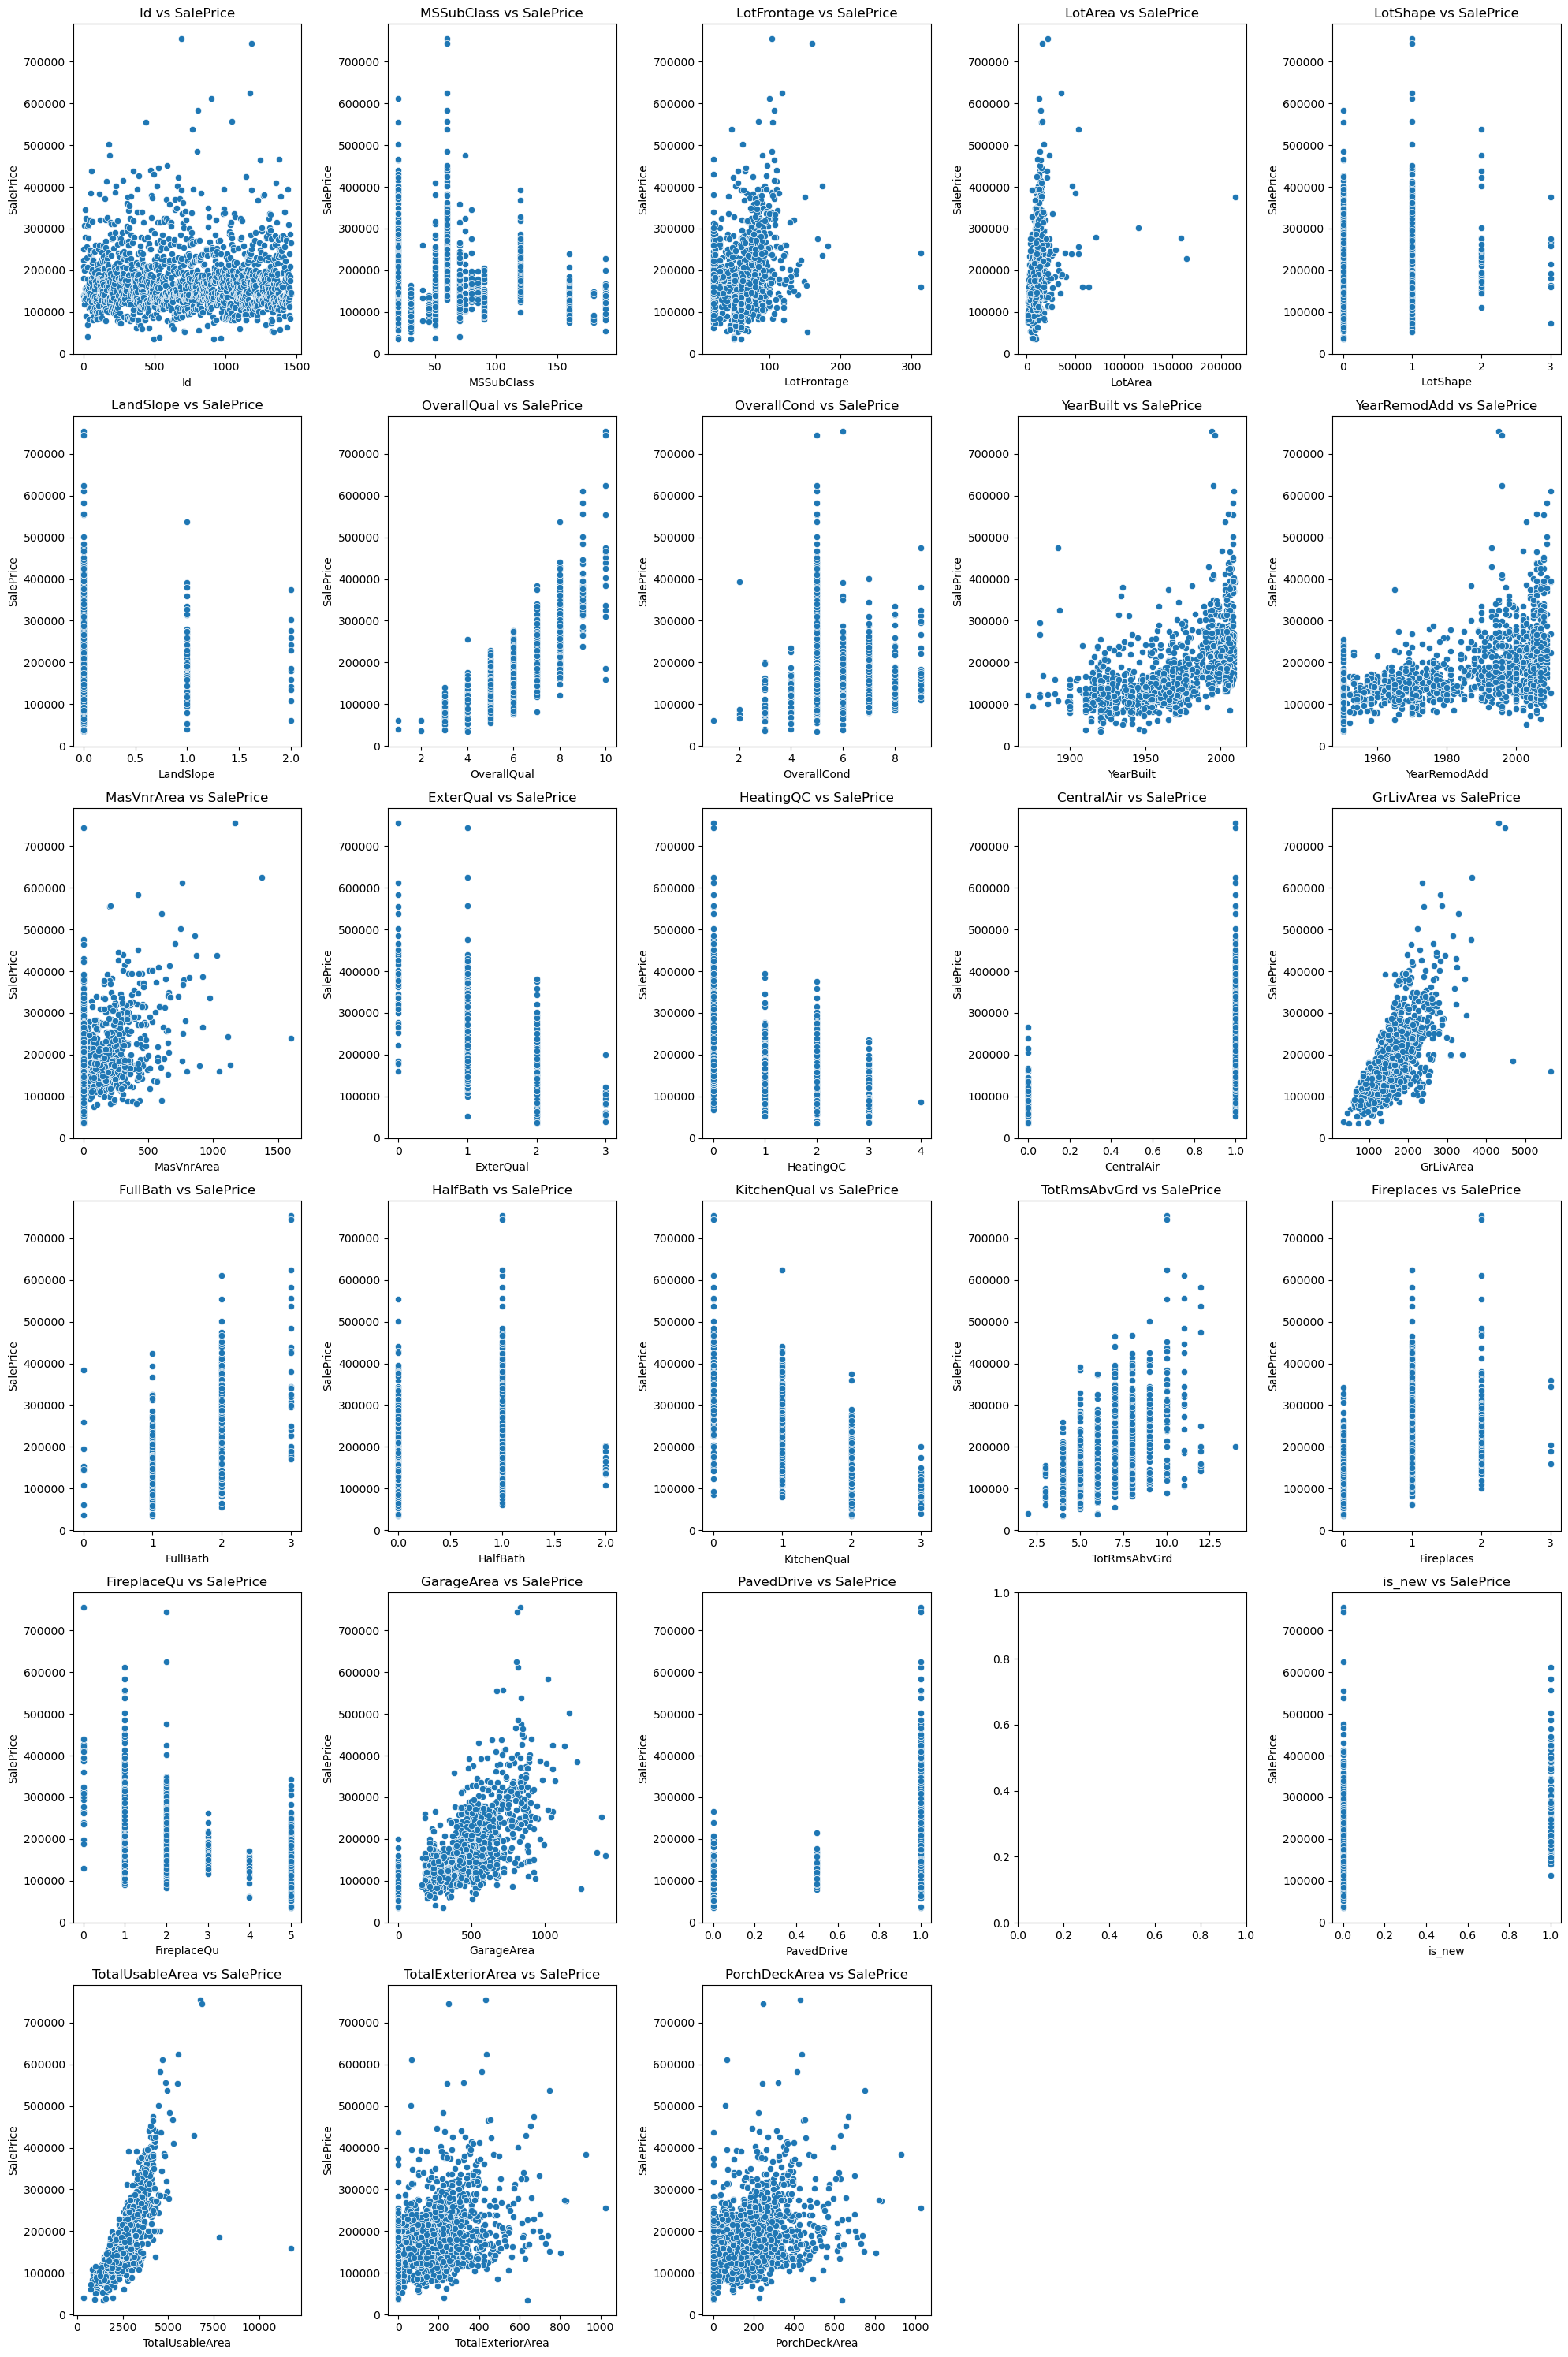

In [203]:
compare_variables(df_feature, target='SalePrice')